In [1]:
import pandas as pd
import numpy as np
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [5]:
data.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
data.columns=[each.replace(" ","_") for each in data.columns]
data.columns=[each.replace("/","_") for each in data.columns]
data.columns=[each.replace("-","_") for each in data.columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure_Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [8]:
data.describe()

,Unnamed:_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
data = data.drop(['id','Unnamed:_0'],axis=1)

In [10]:
data.describe(include = object)

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [11]:
#EDA

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum().sort_values(ascending=False)

Arrival_Delay_in_Minutes             310
Gender                                 0
Seat_comfort                           0
Departure_Delay_in_Minutes             0
Cleanliness                            0
Inflight_service                       0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
On_board_service                       0
Inflight_entertainment                 0
Online_boarding                        0
Customer_Type                          0
Food_and_drink                         0
Gate_location                          0
Ease_of_Online_booking                 0
Departure_Arrival_time_convenient      0
Inflight_wifi_service                  0
Flight_Distance                        0
Class                                  0
Type_of_Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

In [14]:
data["Arrival_Delay_in_Minutes"]=data["Arrival_Delay_in_Minutes"].fillna(stats.mode(data["Arrival_Delay_in_Minutes"]).mode[0])

In [15]:
data.isnull().sum().sort_values(ascending=False)

Gender                               0
Seat_comfort                         0
Arrival_Delay_in_Minutes             0
Departure_Delay_in_Minutes           0
Cleanliness                          0
Inflight_service                     0
Checkin_service                      0
Baggage_handling                     0
Leg_room_service                     0
On_board_service                     0
Inflight_entertainment               0
Online_boarding                      0
Customer_Type                        0
Food_and_drink                       0
Gate_location                        0
Ease_of_Online_booking               0
Departure_Arrival_time_convenient    0
Inflight_wifi_service                0
Flight_Distance                      0
Class                                0
Type_of_Travel                       0
Age                                  0
satisfaction                         0
dtype: int64

In [16]:
data.groupby('satisfaction').mean()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,37.566688,928.919971,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.074594
satisfied,41.750583,1530.140255,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.594892


In [17]:
data.groupby('satisfaction').median()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,36.0,671.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,0.0,0.0
satisfied,43.0,1250.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0


### exploring each feature

([<matplotlib.patches.Wedge at 0x1e91c17d7d0>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'Neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'Satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

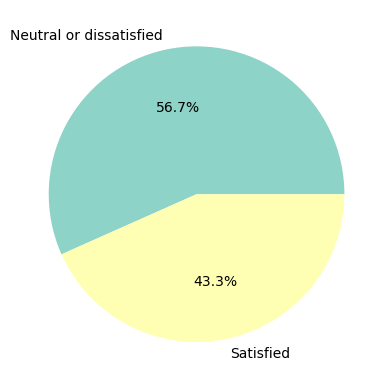

In [18]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Set3"), autopct = '%1.1f%%')

> The classes are somewhat balanced

In [19]:
categ_indices = [0, 1, 3, 4] + list(range(6, 20))

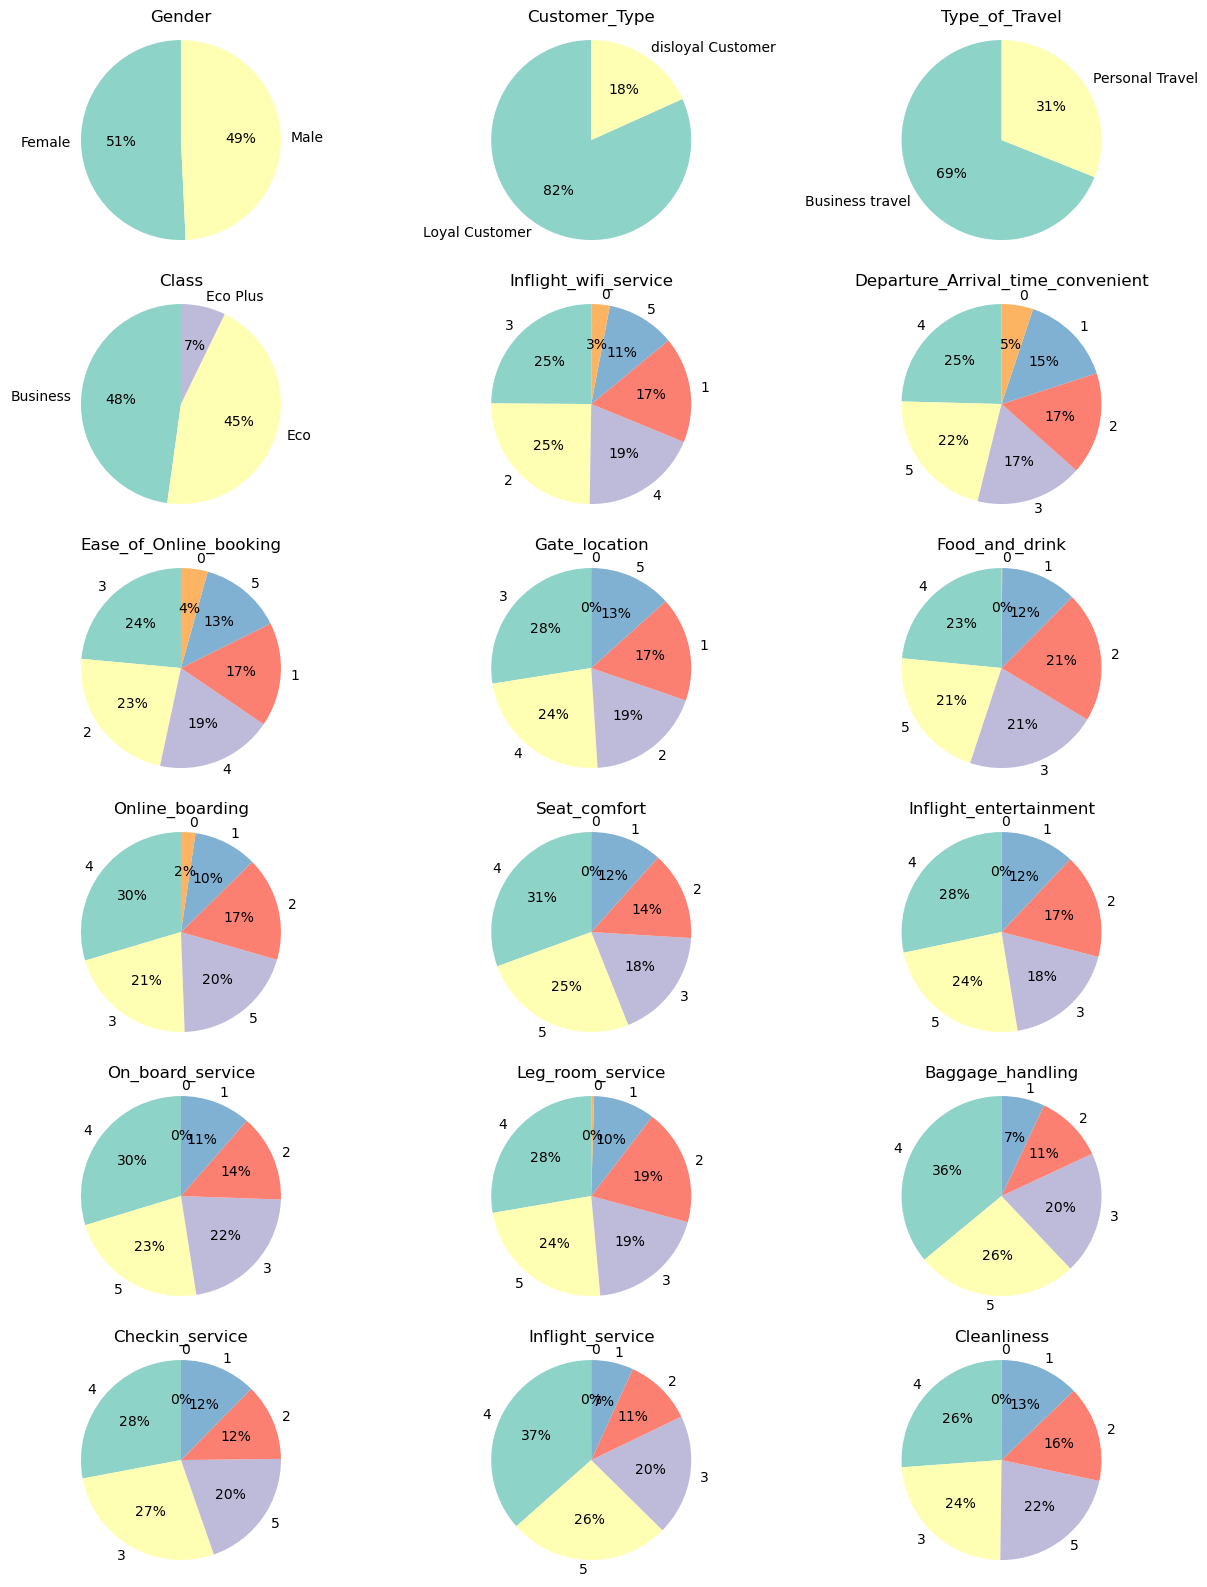

In [20]:
categ = data.iloc[:,categ_indices]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Set3"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

#### GENDER

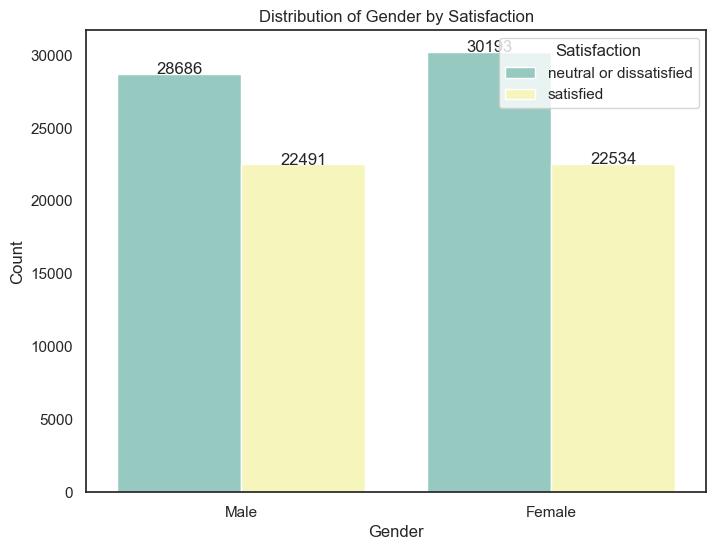

In [21]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender by Satisfaction')

plt.legend(title='Satisfaction', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

> Number of female and male passengers is almost equal<br><br>
> The gender of the passenger **does not** seem to have any effect on the satisfaction/dissatisfaction of the customer

#### SEAT COMFORT

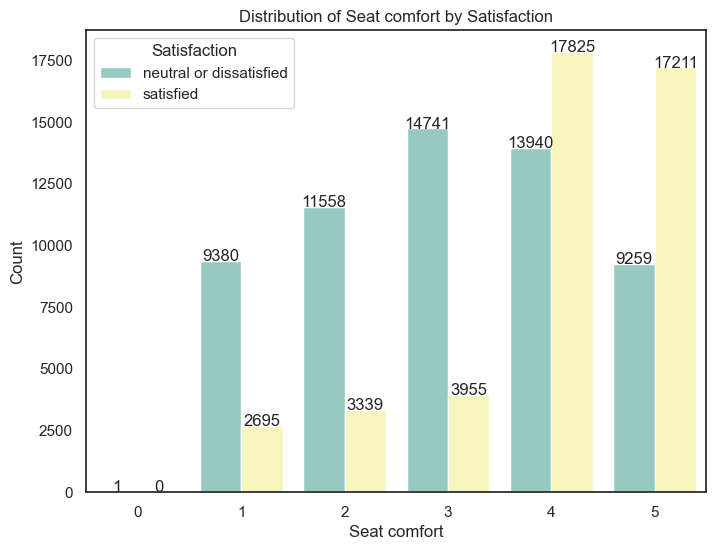

In [22]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Seat_comfort', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Seat comfort')
plt.ylabel('Count')
plt.title('Distribution of Seat comfort by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

> Passengers with seat comfort of 4 or 5 are generally more satisfied than the rest

#### ARRIVAL DELAY (IN MINUTES)

<Axes: xlabel='Arrival_Delay_in_Minutes', ylabel='Density'>

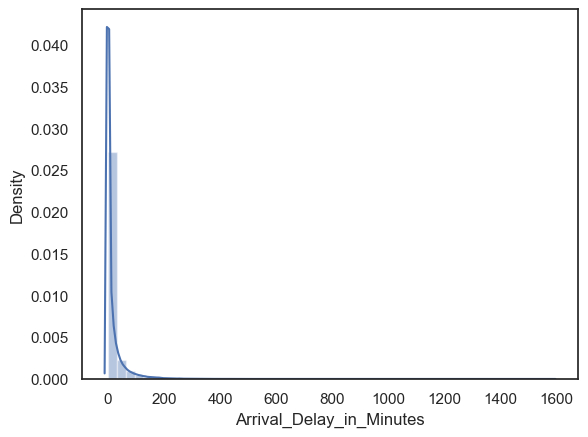

In [23]:
sns.distplot(data['Arrival_Delay_in_Minutes'])

> Most of the observations lie in the interval 0-100

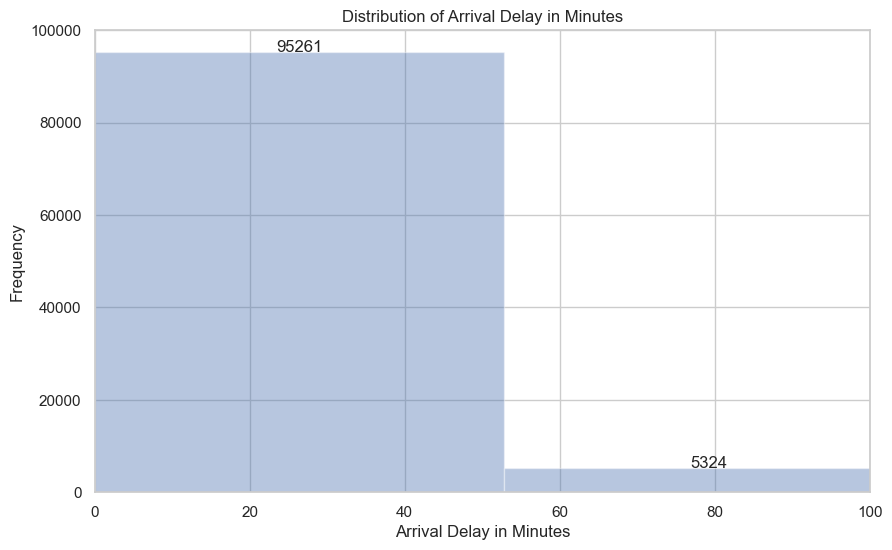

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.distplot(data['Arrival_Delay_in_Minutes'], bins=30, kde=False)

plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay in Minutes')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.xlim(0, 100)

plt.show()

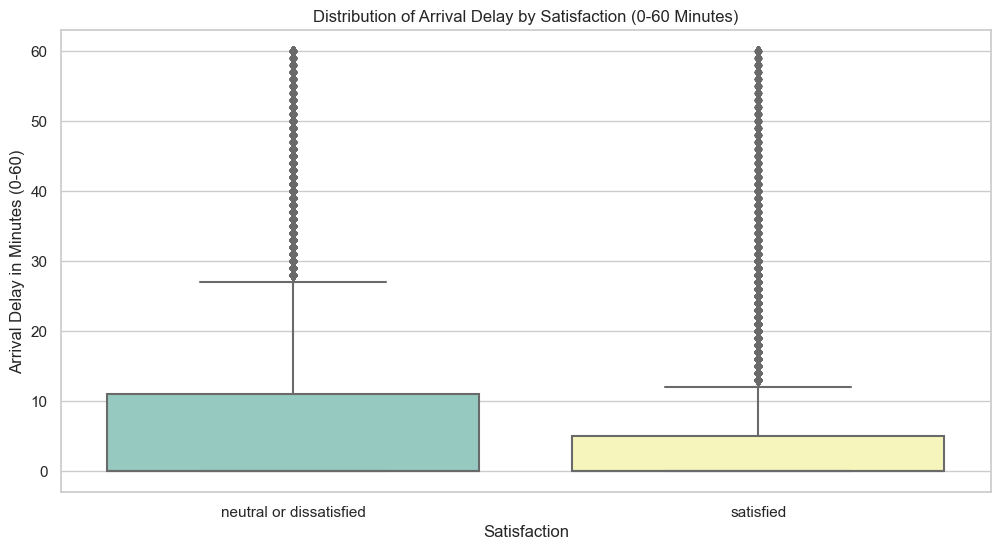

In [25]:
filtered_data = data[(data['Arrival_Delay_in_Minutes'] >= 0) & (data['Arrival_Delay_in_Minutes'] <= 60)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(x='satisfaction', y='Arrival_Delay_in_Minutes', data=filtered_data, palette='Set3')

plt.xlabel('Satisfaction')
plt.ylabel('Arrival Delay in Minutes (0-60)')
plt.title('Distribution of Arrival Delay by Satisfaction (0-60 Minutes)')

plt.show()

>Passengers who faced flight departure delayes of 5 minutes or longer more likely to fall into the neutral/dissatisfied category


#### DEPARTURE DELAY (IN MINUTES)

<Axes: xlabel='Departure_Delay_in_Minutes', ylabel='Density'>

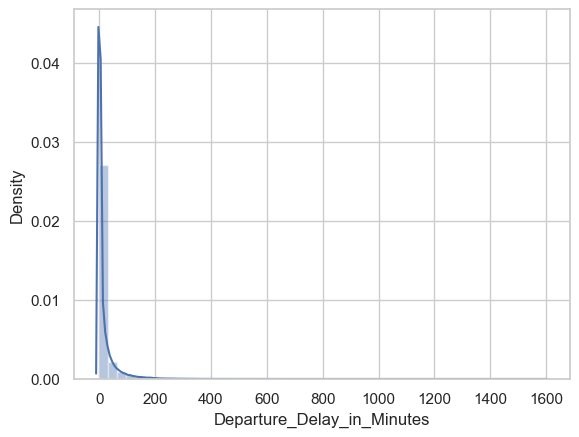

In [26]:
sns.distplot(data['Departure_Delay_in_Minutes'])

> Most of the observations lie in the interval 0-100

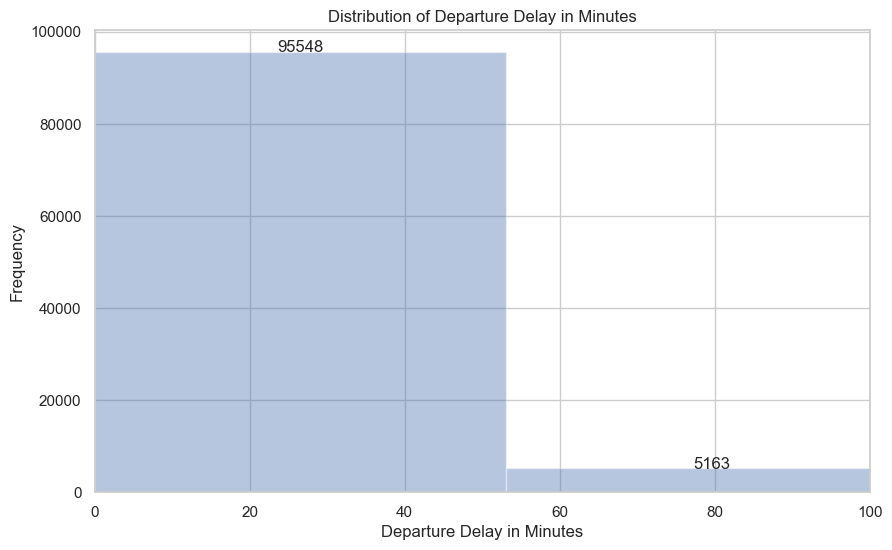

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.distplot(data['Departure_Delay_in_Minutes'], bins=30, kde=False)

plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay in Minutes')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.xlim(0, 100)

plt.show()

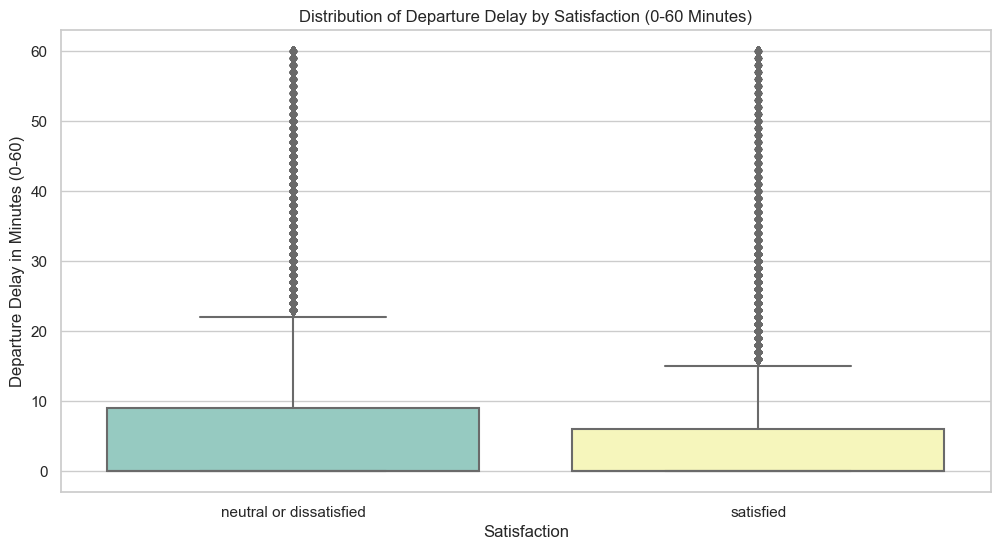

In [28]:
filtered_data = data[(data['Departure_Delay_in_Minutes'] >= 0) & (data['Departure_Delay_in_Minutes'] <= 60)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(x='satisfaction', y='Departure_Delay_in_Minutes', data=filtered_data, palette='Set3')

plt.xlabel('Satisfaction')
plt.ylabel('Departure Delay in Minutes (0-60)')
plt.title('Distribution of Departure Delay by Satisfaction (0-60 Minutes)')

plt.show()

>Passengers who faced flight departure delayes of 6 minutes or longer were generally more dissatisfied


#### CLEANLINESS

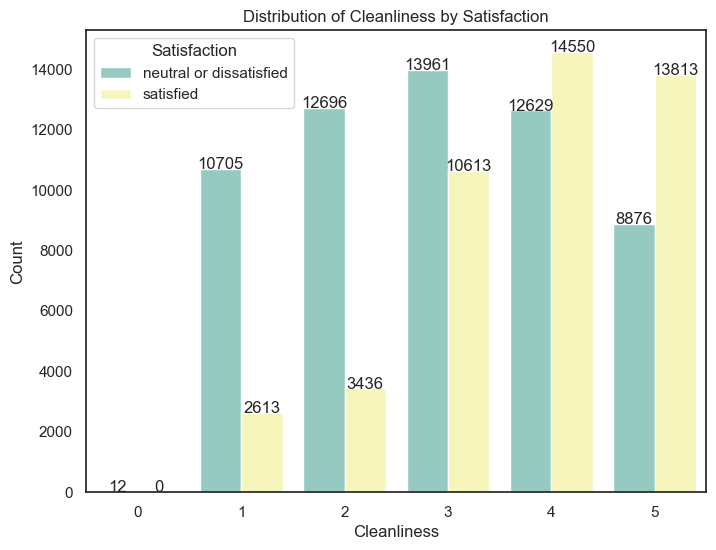

In [29]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Cleanliness', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Cleanliness')
plt.ylabel('Count')
plt.title('Distribution of Cleanliness by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

> Passengers are generally satisfied when cleanliness levels are 4 or 5<br><br>
> For cleanliness levels 3 or lower, passengers are either neutral/dissatisfied

#### INFLIGHT SERVICE

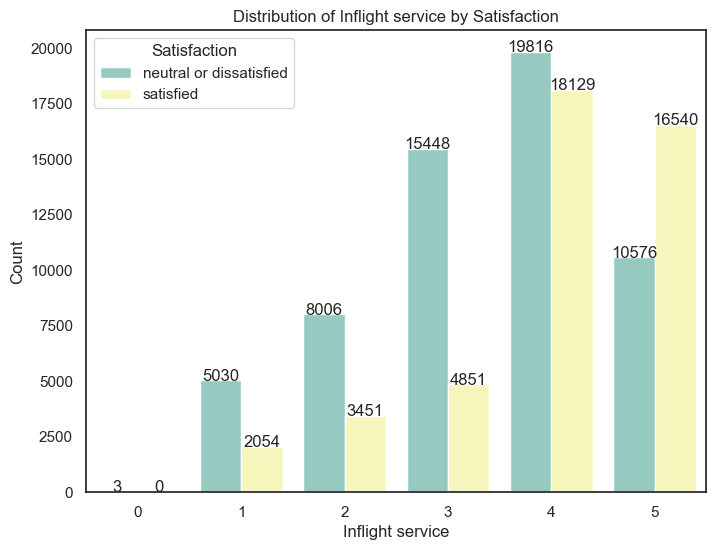

In [30]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Inflight_service', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Inflight service')
plt.ylabel('Count')
plt.title('Distribution of Inflight service by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>Passengers are generally more satisfied when the inflight service level is 5<br><br>
>For levels 0-3, the number of neutral/dissatisfied passengers is at least 100% higher than the satisfied passengers in the respective levels. The difference is extremely pronounced for level 3.

#### CHECKIN SERVICE

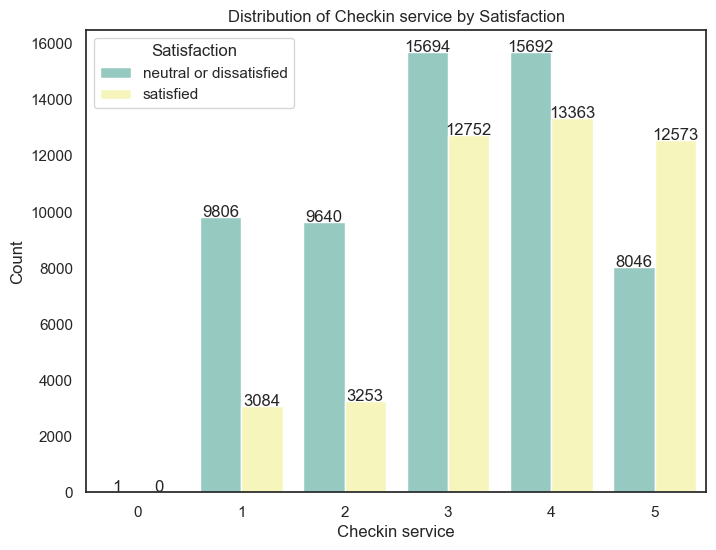

In [31]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Checkin_service', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Checkin service')
plt.ylabel('Count')
plt.title('Distribution of Checkin service by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>For Checkin service levels 1 and 2, the number of neutral/dissatisfied passengers is at least 150% of the satisfied passengers.<br><br>
>For levels 3 and 4, the number of neutral/dissatisfied passengers is only slightly less than the satisfied ones.<br><br>
>For level 5, the passengers are generally satisfied

#### BAGGAGE HANDLING

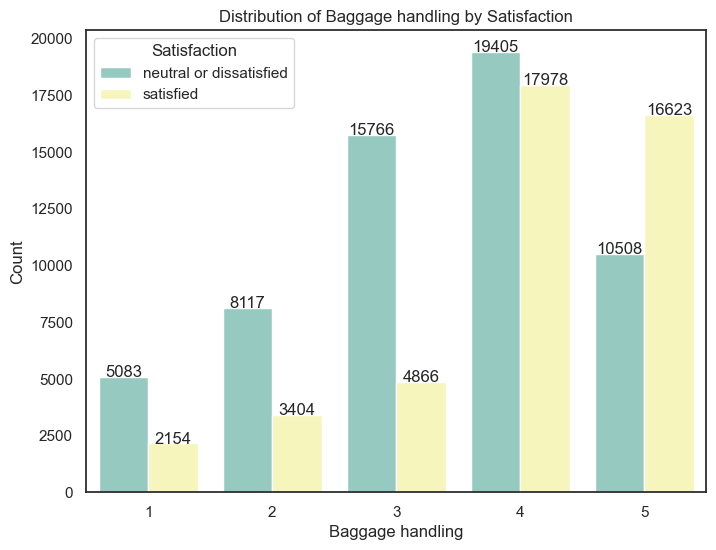

In [32]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Baggage_handling', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Baggage handling')
plt.ylabel('Count')
plt.title('Distribution of Baggage handling by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>For baggage handling levels 1-3, a majority of the passengers are neutral/dissatisfied<br><br>
>For level 4, the number of neutral/dissatisfied passengers is only slightly higher than the satisfied passengers<br><br>
>For level 5, the number of satisfied passengers exceeds the neutral/dissatisfied ones by at least 58%

#### LEG-ROOM SERVICE

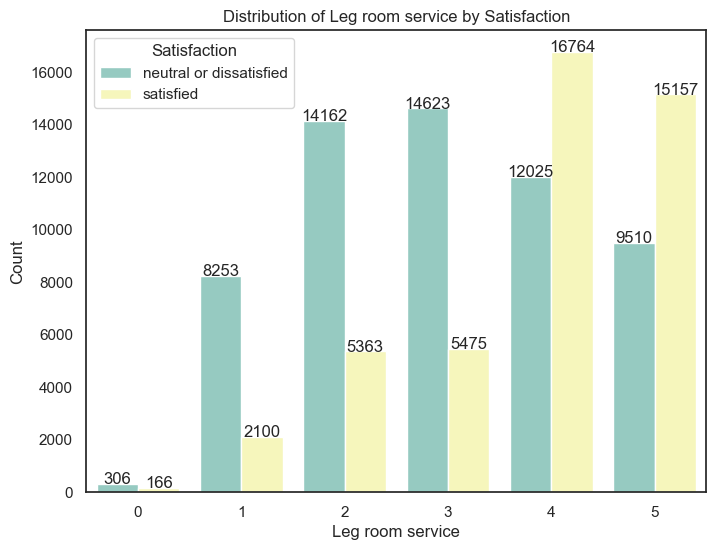

In [33]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Leg_room_service', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Leg room service')
plt.ylabel('Count')
plt.title('Distribution of Leg room service by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>For leg-room service levels 4 and 5, the passengers are more likely to be satisfied<br><br>
>For the rest of the levels, satisfied passengers only constitute ~26% of all passengers<br><br>
>

#### ON-BOARD SERVICE

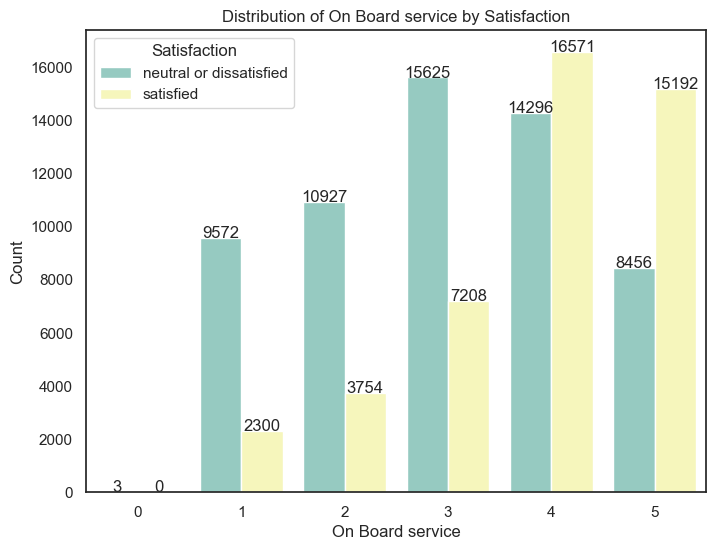

In [34]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='On_board_service', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('On Board service')
plt.ylabel('Count')
plt.title('Distribution of On Board service by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

> approximately 64% and 53% of the passengers on levels 5 and 4 (respectively), are satisfied with their flight experience<br><br>
> for levels 3 and lower, more than 73% of the passengers were neutral/dissatisfied with their flight experience


#### INFLIGHT ENTERTAINMENT

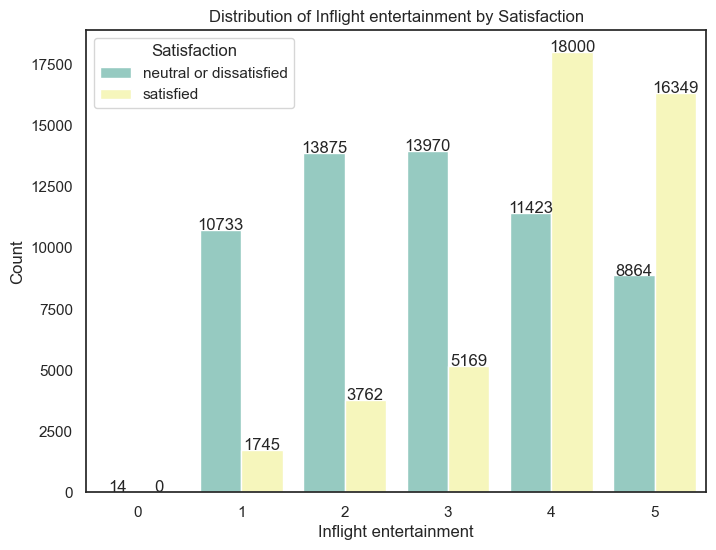

In [35]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Inflight_entertainment', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Inflight entertainment')
plt.ylabel('Count')
plt.title('Distribution of Inflight entertainment by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>approximately 65% of the passengers on level 5 were satisfied with their flight experience
<br><br>
>level 4 closely followed with approximately 61% of the passengers being satisfied<br><br>
>for levels 3 and lower, more than 78% of the passengers were neutral/dissatisfied with their flight experience

#### ONLINE BOARDING

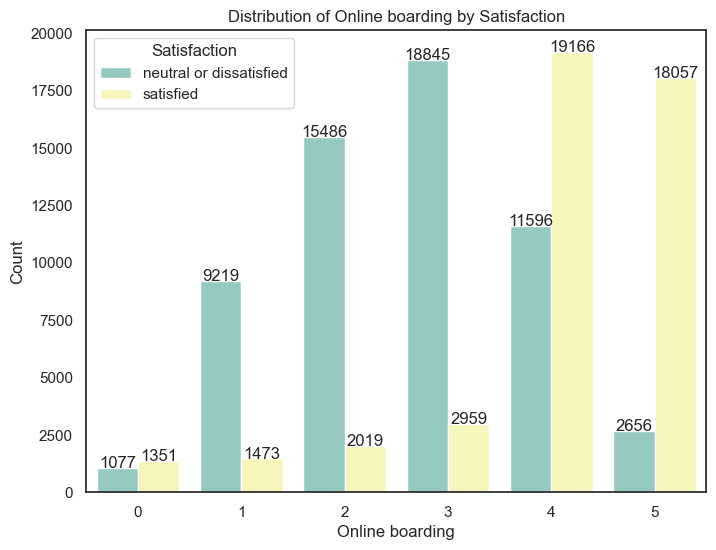

In [36]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Online_boarding', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Online boarding')
plt.ylabel('Count')
plt.title('Distribution of Online boarding by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>Passenger on online boarding levels 5 showed an extremely high satisfaction rate with more 87% of the passengers being satisfied<br><br>
>Level 4 followed closely with the percentage of satisfied passengers being more than 62%<br><br>
>Level 0 passengers also showed a slight inclination in favour of the satisfied category<br><br>
>Levels 1, 2 and, 3 however, had stark contrast. At least 87% of the passengers in these three levels combined were not satisfied.

#### CUSTOMER TYPE

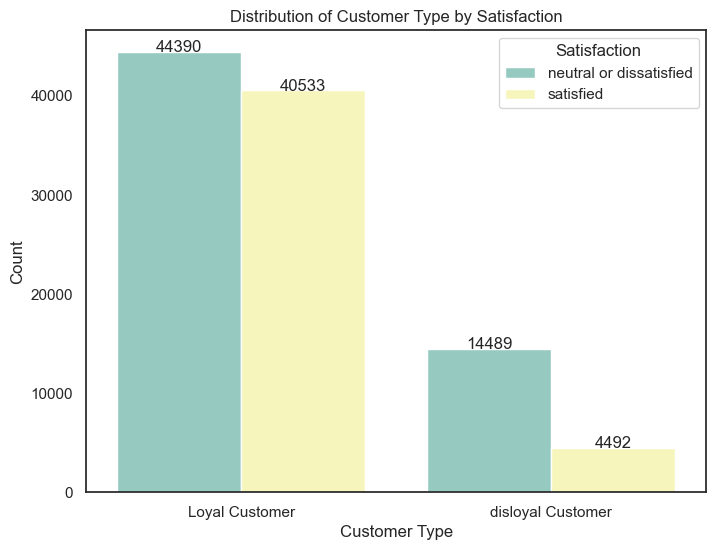

In [37]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Customer_Type', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Type by Satisfaction')

plt.legend(title='Satisfaction', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>approximately 48% of the loyal passengers were satisfied<br><br>
>while only around 24% of the disloyal passengers were satisfied

#### FOOD AND DRINKS

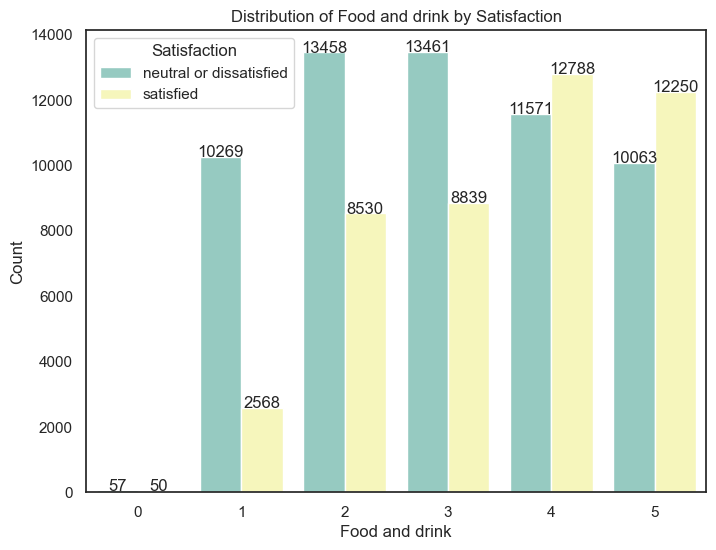

In [38]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Food_and_drink', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Food and drink')
plt.ylabel('Count')
plt.title('Distribution of Food and drink by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>For level 0, the number of satisfied and neutral/dissatisfied passengers was almost equal<br><br>
>Out of all the passengers in levels 1, 2 and, 3, only around 35% of the passengers were satisfied<br><br>
>In case of levels 4 and 5, aproximately 55% of the passengers were satisfied

#### GATE LOCATION

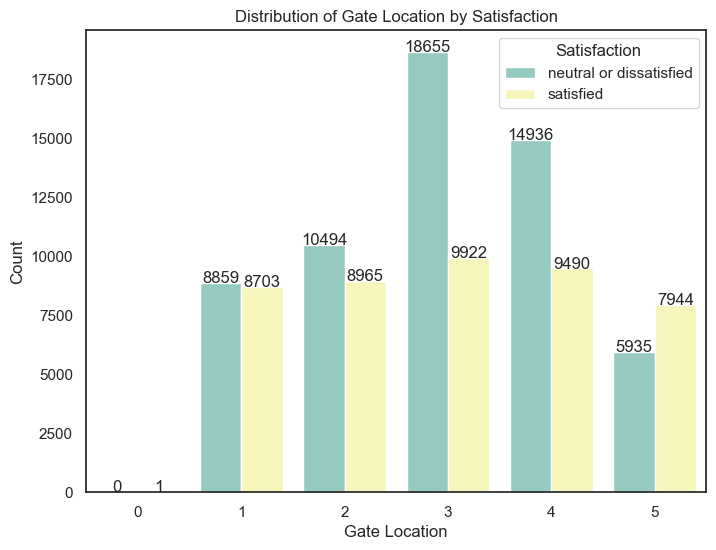

In [39]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gate_location', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Gate Location')
plt.ylabel('Count')
plt.title('Distribution of Gate Location by Satisfaction')

plt.legend(title='Satisfaction', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>Gate location 3 saw the most number of neutral/dissatisfied passengers(~65.3%)<br><br>
>For location 1, the number of satisfied and neutral/dissatisfied passengers was almost equal<br><br>
>In case of location 2, neutral/dissatisfied passengers constituted almost 54% of the total number<br><br>
>Only ~39% of the location 4 passengers were satisfied<br><br>
>Approximately 57% of the location 5 passengers were satisfied

#### EASE OF ONLINE BOOKING

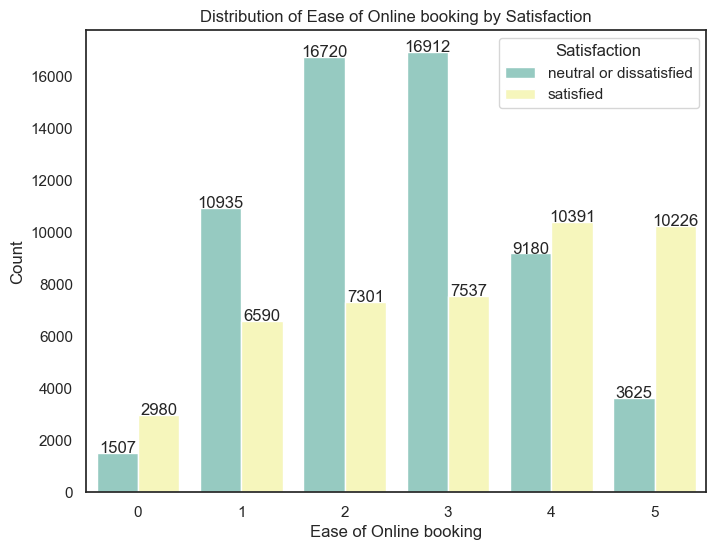

In [40]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Ease_of_Online_booking', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Ease of Online booking')
plt.ylabel('Count')
plt.title('Distribution of Ease of Online booking by Satisfaction')

plt.legend(title='Satisfaction', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>For levels 1 to 3, the passengers were generally neutral/dissatisfied with the flight - constituting around 67.5% of teh total number in these three levels combined<br><br>
>In level 0, ~66% of the passengers were satisfied<br><br>
>In level 4 the number of satisfied and neutral/dissatisfied passengers was very close<br><br>
>~74% of the level 5 passengers were satisfied

#### DEPARTURE/ARRIVAL TIME CONVENIENCE

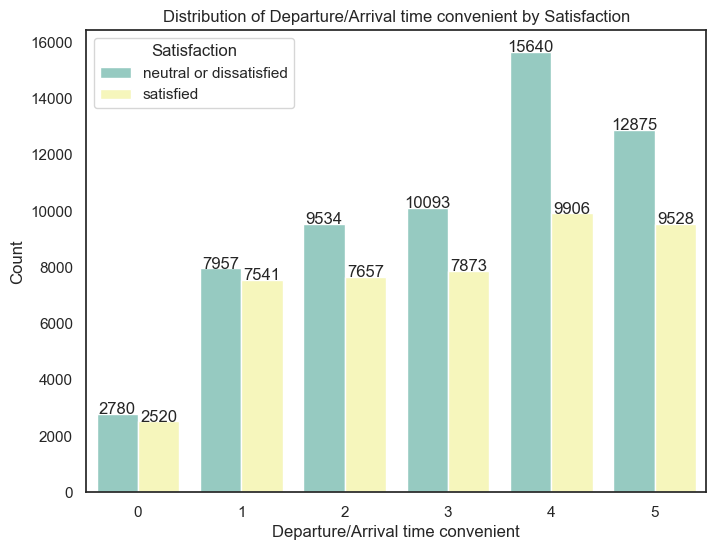

In [41]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Departure_Arrival_time_convenient', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Departure/Arrival time convenient')
plt.ylabel('Count')
plt.title('Distribution of Departure/Arrival time convenient by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>The number of neutral/dissatisfied passengers across all levels was higher than the satisfied passengers<br><br>
>The proportion of satisfied passengers was notably lower for level 4 (only ~39%)<br><br>
>For levels 0 and 1, the passengers were almost equally divided between the 2 satisfaction categories

#### INFLIGHT WiFi SERVICE

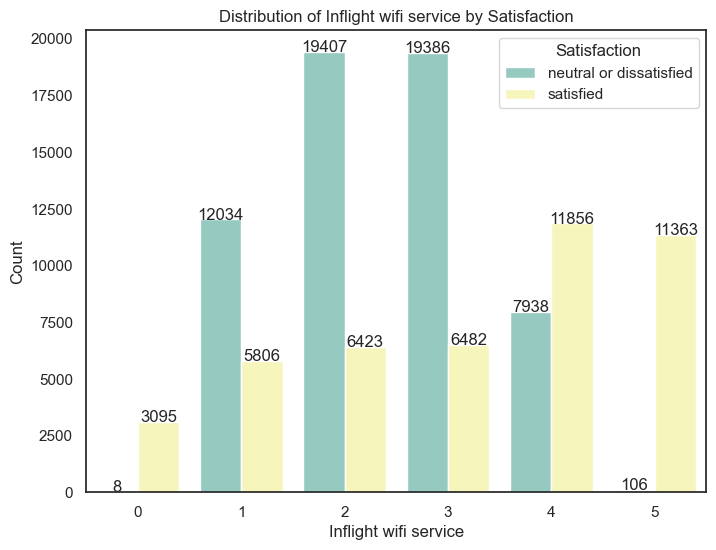

In [42]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Inflight_wifi_service', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Inflight wifi service')
plt.ylabel('Count')
plt.title('Distribution of Inflight wifi service by Satisfaction')

plt.legend(title='Satisfaction', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>Passengers in level 0, 4 and, 5 were generally more satisfied than the ones in levels 1 to 3<br><br>
>Levels 0 and 5 saw very high proportions of satisfied passengers with 99.7% and 99% respectively<br><br>
>Levels 1 to 3 saw mainly neutral/dissatisfied passengers - around 73% with the three levels combined

#### FLIGHT DISTANCE

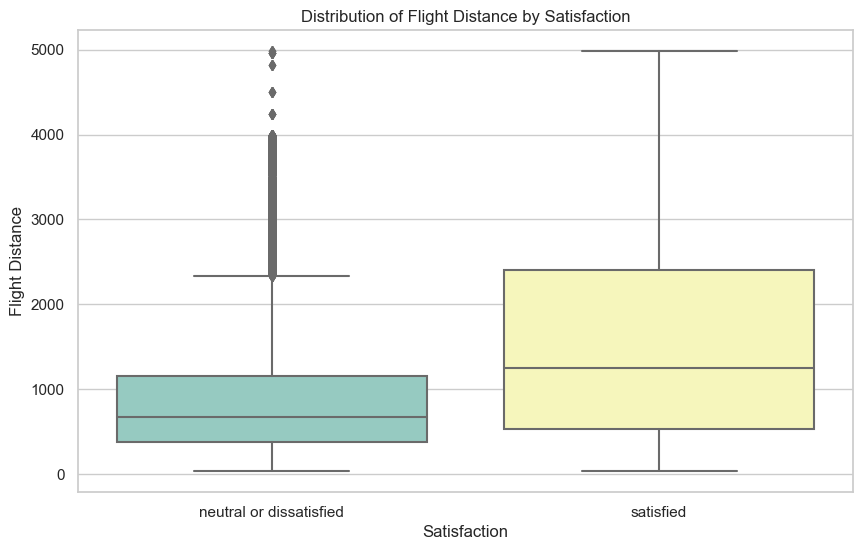

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(x='satisfaction', y='Flight_Distance', data=data, palette='Set3')

plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.title('Distribution of Flight Distance by Satisfaction')

plt.show()

>For shorter flights, the proportion of neutral/dissatisfied passengers is much higher - especially for distances less than 500 units of measurement (mi or km)<br><br>
>For distances 1200 and above, the passengers are mostly satisfied.

#### CLASS

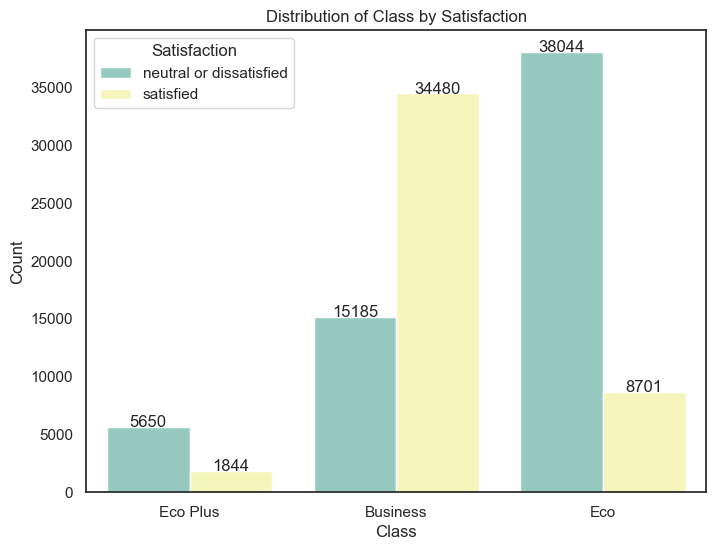

In [44]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>Passengers in the Business Class were generally satisfied.<br><br>
>Eco was the worst performing class with only 18.6% of teh passengers being satisfied<br><br>
>Eco Plus performed slightly better with 24.6%

#### TYPE OF TRAVEL

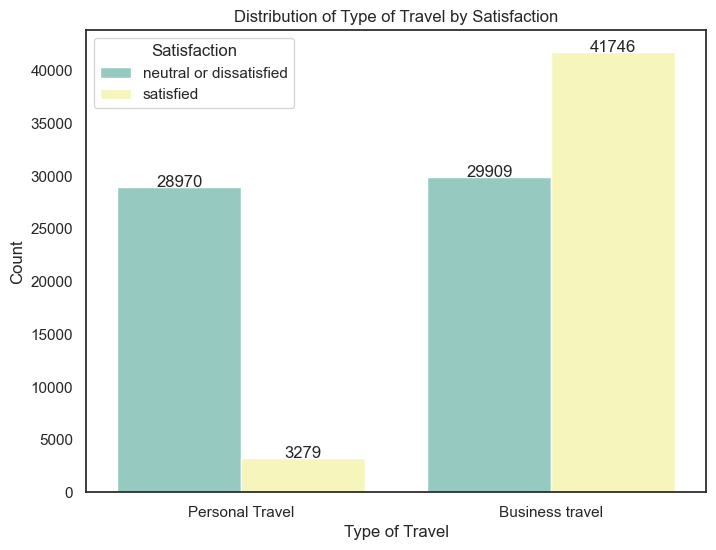

In [45]:
sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Type_of_Travel', data=data, hue='satisfaction', palette='Set3')

plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.title('Distribution of Type of Travel by Satisfaction')

plt.legend(title='Satisfaction', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

>Passengers travelling for business were generally more satisfied than the ones travelling for personal purposes<br><br>
>Out of the passengers travelling for business purposes, ~58% were satisfied<br><br>
>While only about 10% of the passengers travelling for personal purposes were satisfied

#### AGE

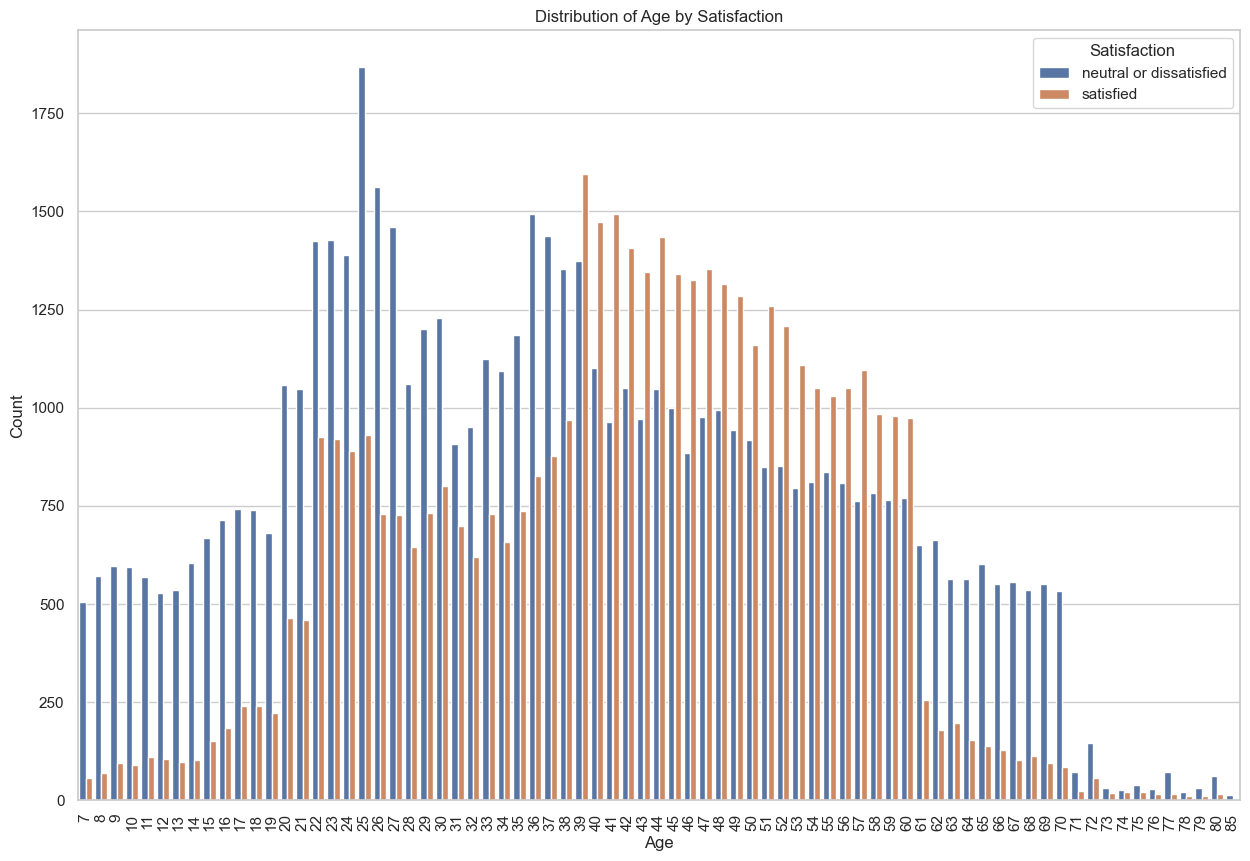

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
sns.countplot(x='Age', data=data, hue='satisfaction')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Satisfaction')

plt.legend(title='Satisfaction', loc='upper right')

plt.xticks(rotation=90)

plt.show()

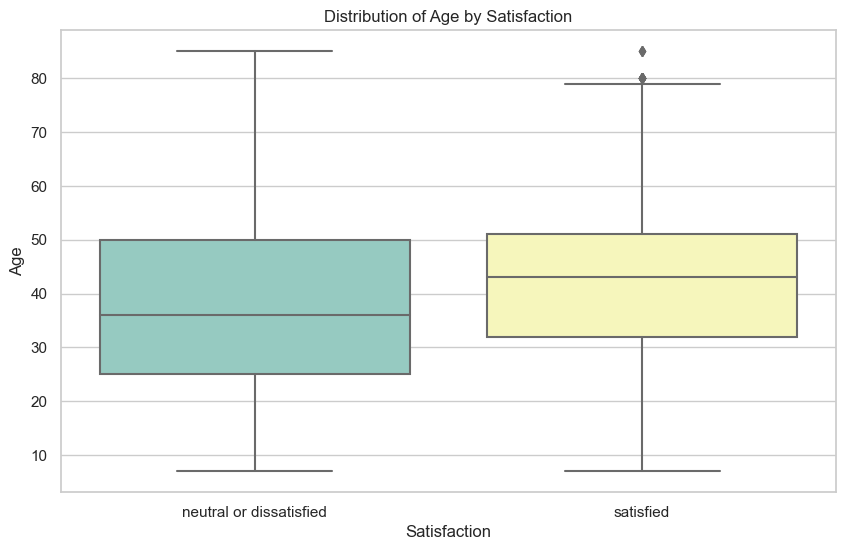

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(x='satisfaction', y='Age', data=data, palette='Set3')

plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.title('Distribution of Age by Satisfaction')

plt.show()

>Ages 39-60 see a much higher proportion of satisfied passengers<br><br>
>For ages below 39 and above 60, the proportion of neutral/dissatisfied passengers is much larger than the satisfied ones

<Axes: >

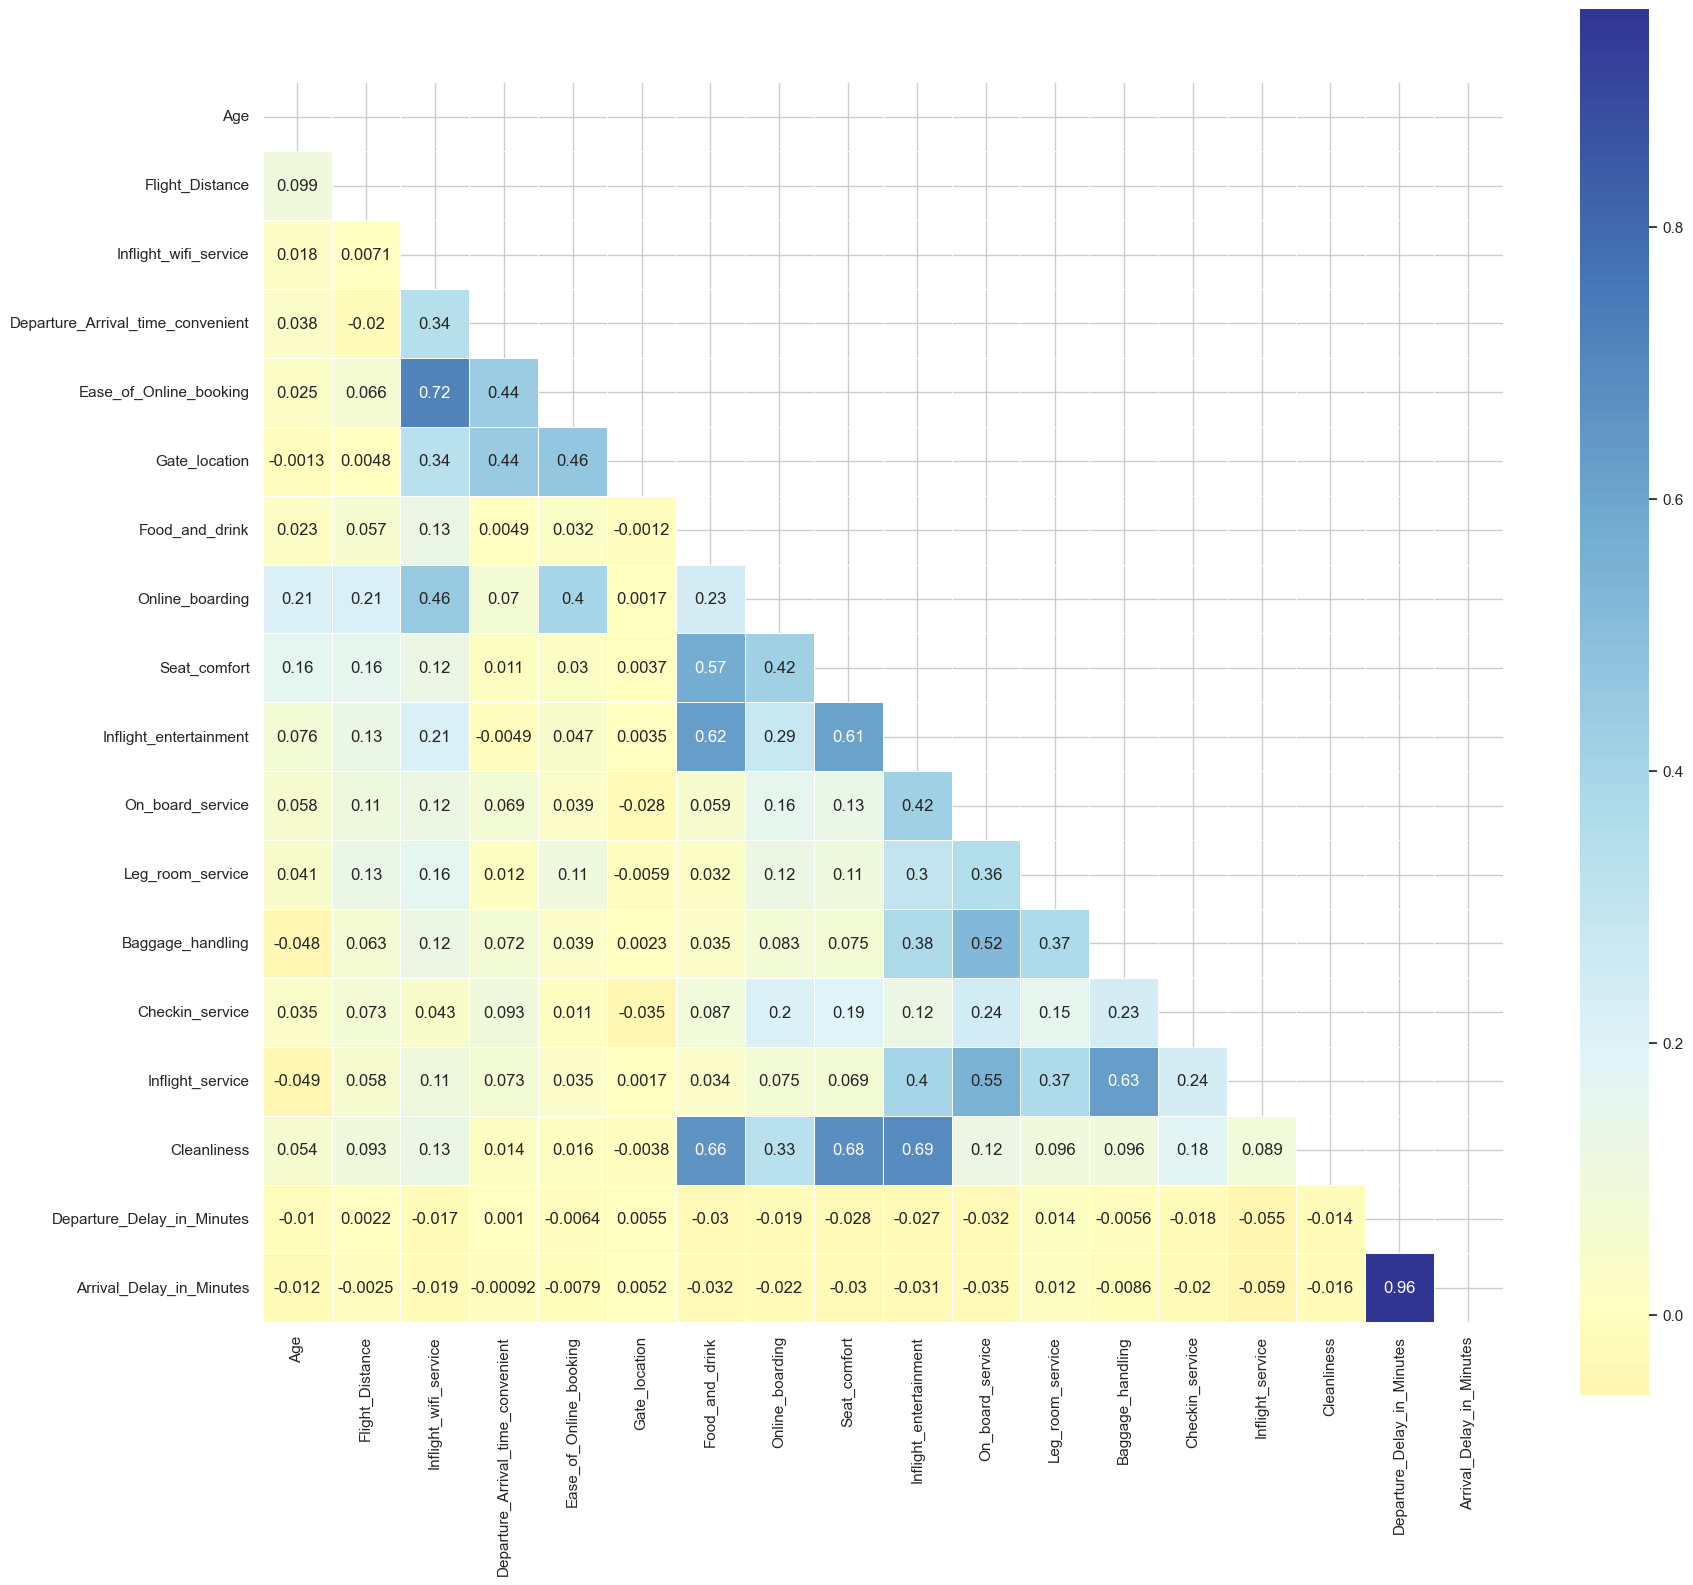

In [48]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(256, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap="RdYlBu", vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

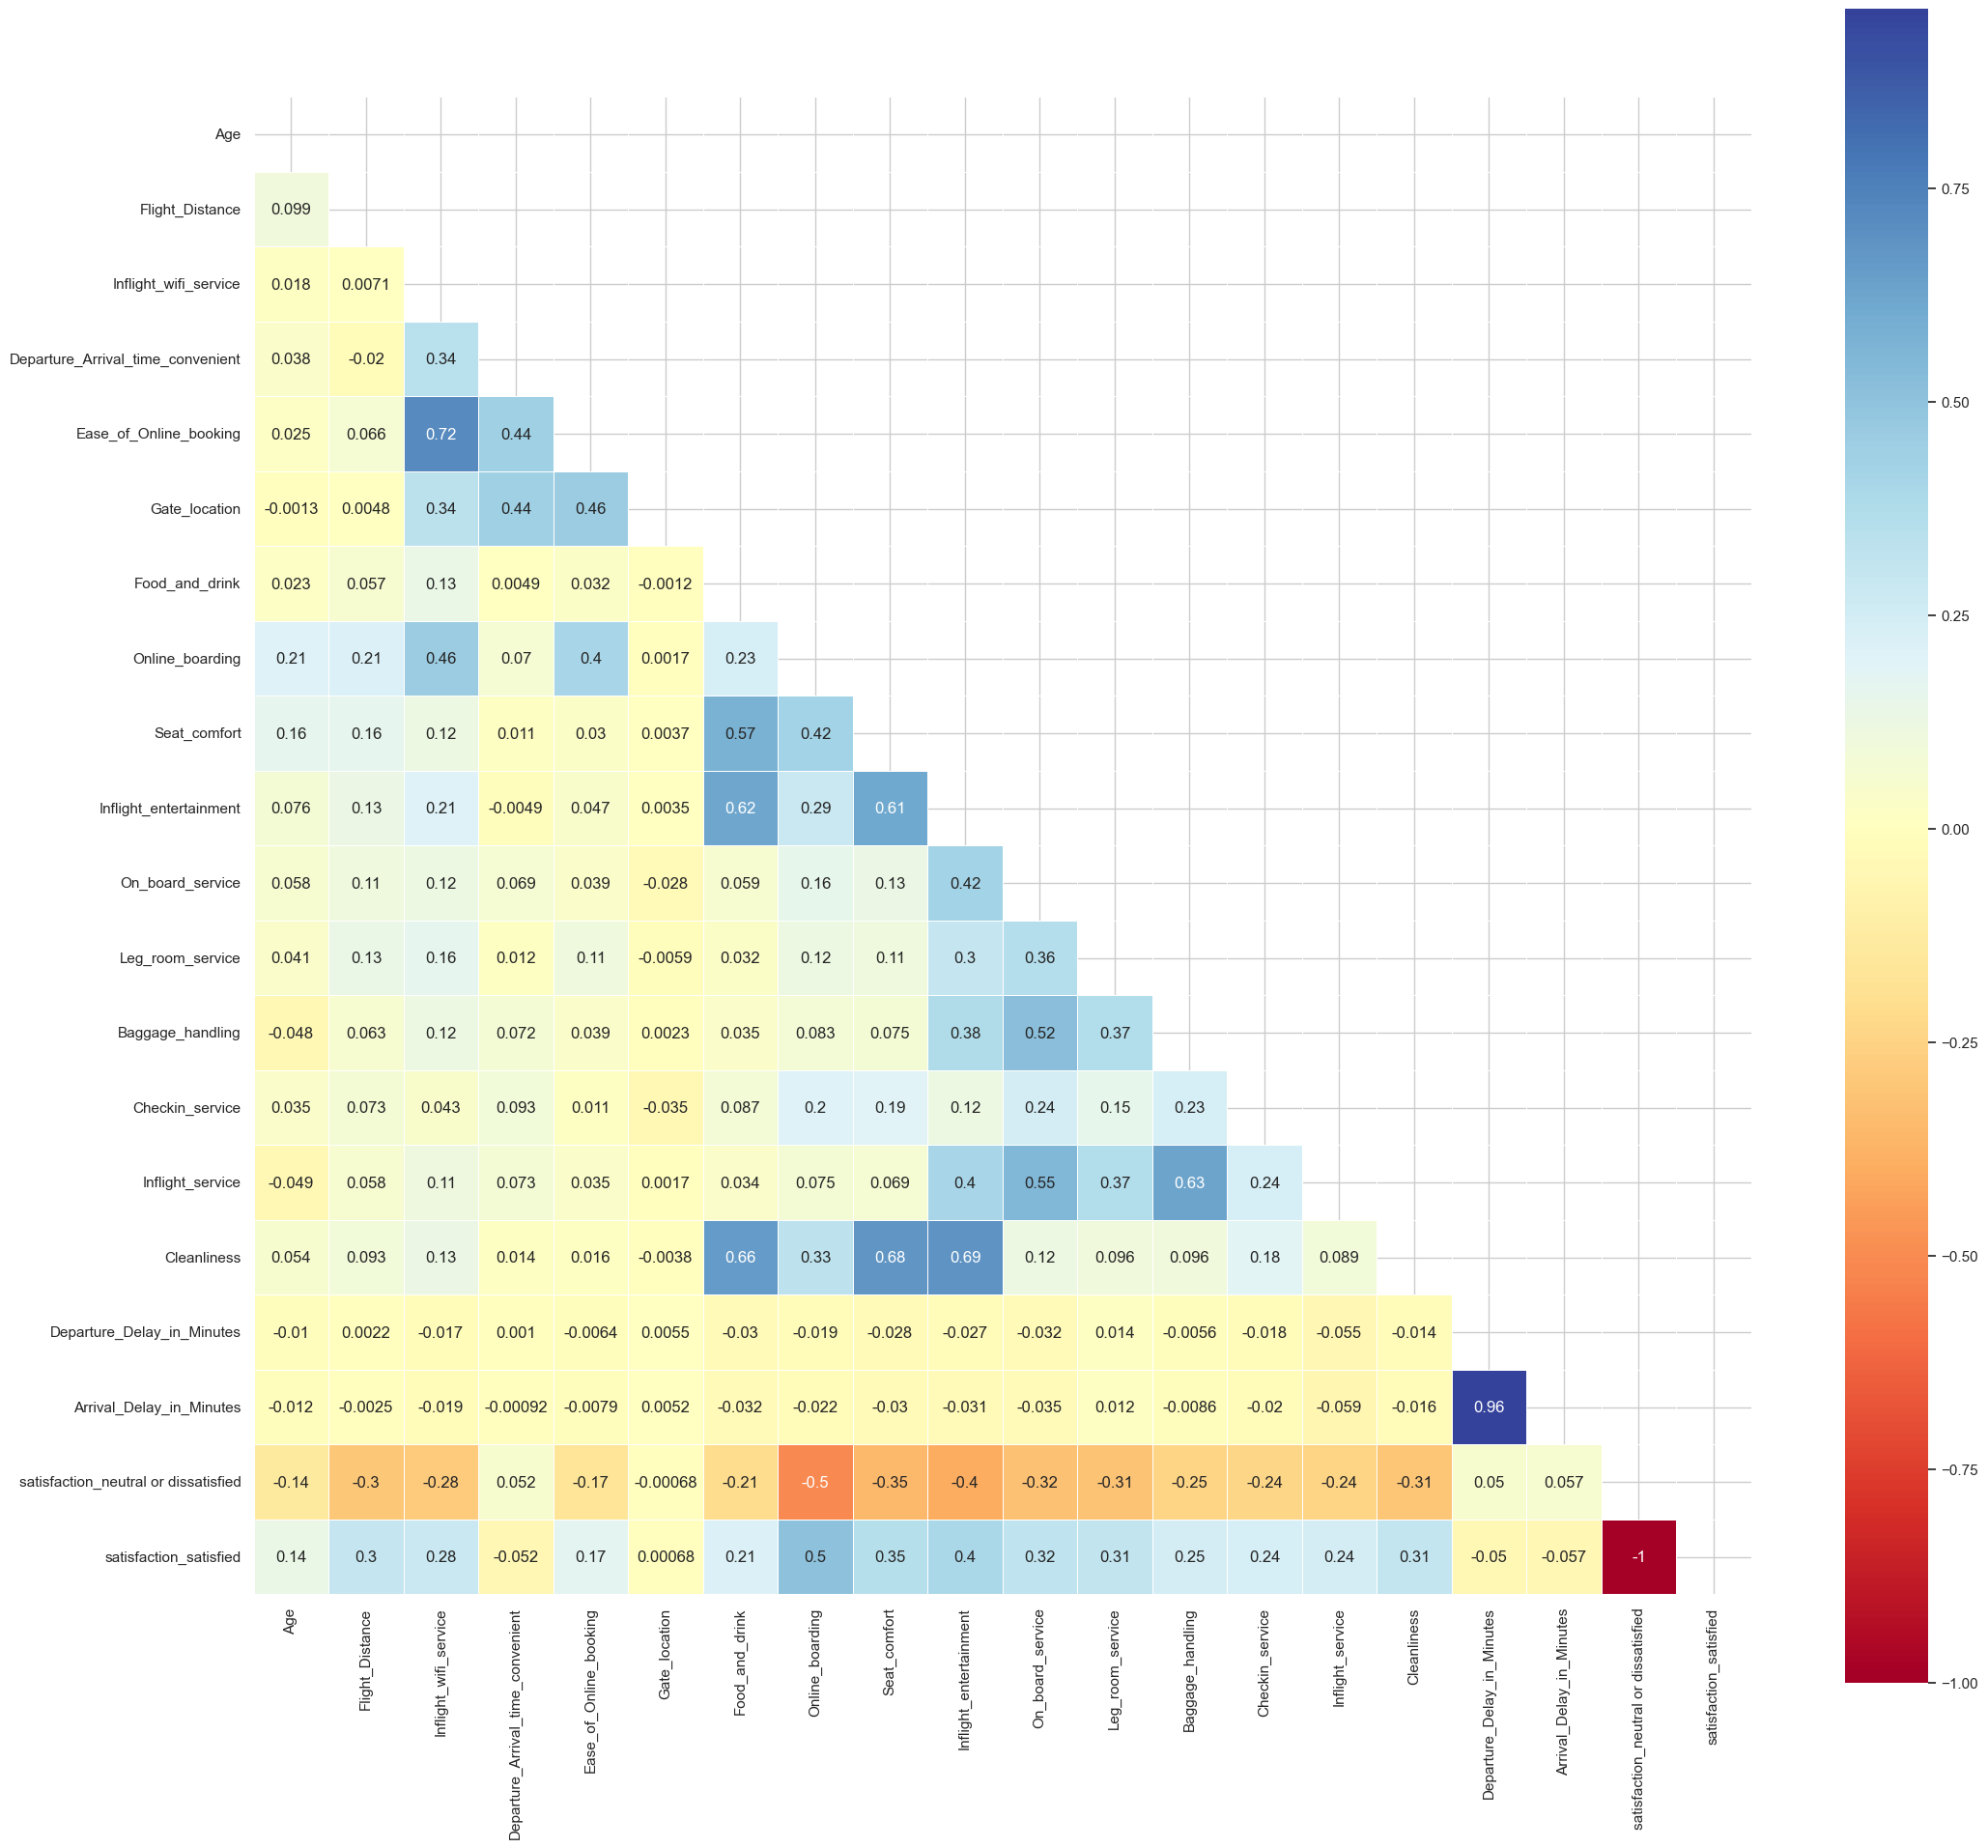

In [49]:
# Perform one-hot encoding for all non-categorical features with target
data_encoded = pd.get_dummies(data, columns=['satisfaction'])

corr_encoded = data_encoded.corr()

mask = np.triu(np.ones_like(corr_encoded, dtype=np.bool_))

plt.figure(figsize=(25, 25))
sns.heatmap(corr_encoded, mask=mask, cmap="RdYlBu", vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

plt.show()


Be sure to avoid comparison between encoded variables (*satisfaction_neutral or dissatisfied* and *satisfaction_satisfied*) derived from the same parent variable(*satisfaction*).<br>This will lead to multicollinearity which hampers analysis